In [46]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

In [47]:
indir_osc_weight_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/osc_weights_new_muon.csv"
osc_weight_MC = pd.read_csv(indir_osc_weight_MC)
print(len(osc_weight_MC))
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])
osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0
print(osc_weight_MC[osc_weight_MC['event_no']==28956376])

38885781
          event_no  osc_weight
28956376  28956376         NaN
          event_no  osc_weight
28956376  28956376         0.0


/tmp/ipykernel_10789/382299087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no']==28956376] = 0


In [48]:
indir_track_cascade_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/track_mu_Burnsample_RD_Full_db.csv"
indir_energy_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/energy_Burnsample_RD_Full_db.csv"
indir_zenith_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/zenith_Burnsample_RD_Full_db.csv"
indir_azimuth_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/azimuth_Burnsample_RD_Full_db.csv"
#indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_MP_lvl3/inference/pid_Burnsample_RD_Full_db.csv"
indir_multiclass_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/pid_Burnsample_RD_Full_db_new_muon.csv"
indir_lvl3_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/lvl3_variables_burnsample.csv"
indir_position_RD = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Burnsample/['position_x', 'position_y', 'position_z']_Burnsample_RD_Full_db.csv"



indir_track_cascade_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/track_cascade_New_muon_test_set_inc_truth.csv"
indir_energy_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/energy_New_muon_test_set_inc_truth.csv"
indir_zenith_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/zenith_New_muon_test_set.csv"
indir_azimuth_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/azimuth_New_muon_test_set.csv"
indir_multiclass_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/pid_Multiclass_try_2_on_test_new_muon.csv"
indir_lvl3_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/lvl3_variables_new_muon.csv"
indir_position_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/Test_set/position_vertex_new_muon.csv"


In [49]:
useful_columns = ['event_no',
       'C2HR6', 'CausalVetoHits', 'CleanedFullTimeLength', 'DCFiducialHits',
       'L3_oscNext_bool', 'NAbove200Hits', 'NchCleaned', 'NoiseEngineNoCharge',
       'RTVetoCutHit', 'STW9000_DTW300Hits', 'UncleanedFullTimeLength',
       'VertexGuessZ', 'VetoFiducialRatioHits']

In [50]:
track_cascade_RD = pd.read_csv(indir_track_cascade_RD).sort_values('event_no').reset_index(drop = True)
energy_RD = pd.read_csv(indir_energy_RD).sort_values('event_no').reset_index(drop = True)
zenith_RD = pd.read_csv(indir_zenith_RD).sort_values('event_no').reset_index(drop = True)
azimuth_RD = pd.read_csv(indir_azimuth_RD).sort_values('event_no').reset_index(drop = True)
multiclass_RD = pd.read_csv(indir_multiclass_RD).sort_values('event_no').reset_index(drop = True)
lvl3_RD = pd.read_csv(indir_lvl3_RD, usecols = useful_columns).sort_values('event_no').reset_index(drop = True)
position_RD = pd.read_csv(indir_position_RD).sort_values('event_no').reset_index(drop = True)

track_cascade_MC = pd.read_csv(indir_track_cascade_MC).sort_values('event_no').reset_index(drop = True)
energy_MC = pd.read_csv(indir_energy_MC).sort_values('event_no').reset_index(drop = True)
zenith_MC = pd.read_csv(indir_zenith_MC).sort_values('event_no').reset_index(drop = True)
azimuth_MC = pd.read_csv(indir_azimuth_MC).sort_values('event_no').reset_index(drop = True)
multiclass_MC = pd.read_csv(indir_multiclass_MC).sort_values('event_no').reset_index(drop = True)
lvl3_MC = pd.read_csv(indir_lvl3_MC, usecols = useful_columns).sort_values('event_no').reset_index(drop = True)
position_MC = pd.read_csv(indir_position_MC).sort_values('event_no').reset_index(drop = True)

In [51]:
print(np.shape(energy_RD))
print(np.shape(multiclass_RD))
print(np.shape(track_cascade_RD))
print(np.shape(zenith_RD))
print(np.shape(azimuth_RD))
print(np.shape(position_RD))

(61739862, 3)
(61739862, 6)
(61739862, 3)
(61739862, 4)
(61739862, 4)
(61739862, 5)


In [52]:
print(np.shape(energy_MC))
print(np.shape(multiclass_MC))
print(np.shape(osc_weight_MC))
print(np.shape(track_cascade_MC))
print(np.shape(zenith_MC))
print(np.shape(azimuth_MC))
print(np.shape(position_MC))


(37235782, 4)
(37235782, 6)
(38885781, 2)
(37235782, 5)
(37235782, 4)
(37235782, 4)
(37235782, 8)


In [53]:
nr_electron_neutrino_i3_files = 602
nr_muon_neutrino_i3_files = 1518
nr_tau_neutrino_i3_files = 334
nr_muon_i3_files = 1093
nr_noise_i3_files = 401

nr_electron_neutrinos_total = 8118575 + 183333
nr_muon_neutrinos_total = 19923619 + 183333
nr_tau_neutrinos_total = 8702748 + 183333
nr_muon_total = 169737 + 550000
nr_noise_total = 321103 + 550000

nr_electron_neutrinos_test = 8118575
nr_muon_neutrinos_test = 19923619
nr_tau_neutrinos_test = 8702748
nr_muon_test = 169737
nr_noise_test =321103

electron_neutrino_add_weight = 1/(nr_electron_neutrino_i3_files*nr_electron_neutrinos_test/nr_electron_neutrinos_total)
muon_neutrino_add_weight = 1/(nr_muon_neutrino_i3_files*nr_muon_neutrinos_test/nr_muon_neutrinos_total)
tau_neutrino_add_weight = 1/(nr_tau_neutrino_i3_files*nr_tau_neutrinos_test/nr_tau_neutrinos_total)
muon_add_weight = 1/(nr_muon_i3_files*nr_muon_test/nr_muon_total)
noise_add_weight = 1/(nr_noise_i3_files*nr_noise_test/nr_noise_total)
print(electron_neutrino_add_weight,muon_neutrino_add_weight,tau_neutrino_add_weight)

electron_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12))].to_list()
muon_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-14,14))].to_list()
tau_neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-16,16))].to_list()
muon_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-13,13))].to_list()
noise_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-1,1))].to_list()
neutrino_event_nos = multiclass_MC['event_no'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))].to_list()

print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight
print(osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))].head(10))
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_event_nos))] *= muon_add_weight
osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((noise_event_nos))] *= noise_add_weight

0.001698641060838674 0.0006648233149566109 0.0030570841456206404
878    1.375828e-07
890    2.086777e-07
904    1.883566e-07
916    2.064462e-07
930    1.458803e-07
932    1.216562e-07
938    3.205147e-07
945    2.292233e-07
946    2.398221e-07
956    1.527254e-07
Name: osc_weight, dtype: float64


/tmp/ipykernel_10789/3908699960.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((electron_neutrino_event_nos))] *= electron_neutrino_add_weight


878    2.337037e-10
890    3.544685e-10
904    3.199503e-10
916    3.506780e-10
930    2.477983e-10
932    2.066502e-10
938    5.444394e-10
945    3.893682e-10
946    4.073716e-10
956    2.594257e-10
Name: osc_weight, dtype: float64


/tmp/ipykernel_10789/3908699960.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((muon_neutrino_event_nos))] *= muon_neutrino_add_weight
/tmp/ipykernel_10789/3908699960.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osc_weight_MC['osc_weight'][osc_weight_MC['event_no'].isin((tau_neutrino_event_nos))] *= tau_neutrino_add_weight
/tmp/ipykernel_10789/3908699960.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [54]:
track_cascade_MC = pd.merge(track_cascade_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
energy_MC = pd.merge(energy_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
zenith_MC = pd.merge(zenith_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
azimuth_MC = pd.merge(azimuth_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
multiclass_MC = pd.merge(multiclass_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)
position_MC = pd.merge(position_MC.reset_index(drop=True),osc_weight_MC.reset_index(drop=True),on='event_no',how='inner').reset_index(drop=True)


In [55]:
Burnsample_weight = 1/(365.2425*24*3600*10*0.01)
track_cascade_RD['osc_weight'] = np.ones(len(track_cascade_RD))*Burnsample_weight
energy_RD['osc_weight'] = np.ones(len(energy_RD))*Burnsample_weight 
zenith_RD['osc_weight'] = np.ones(len(zenith_RD))*Burnsample_weight 
azimuth_RD['osc_weight'] = np.ones(len(azimuth_RD))*Burnsample_weight 
multiclass_RD['osc_weight'] = np.ones(len(multiclass_RD))*Burnsample_weight 
position_RD['osc_weight'] = np.ones(len(position_RD))*Burnsample_weight 

In [56]:
NchCleaned_cut = 5.5 #above this
NoiseEngineNoCharge_cut = 1 #Equal to this
STW9000_DTW300Hits_cut = 2.5 #above this
DCFiducialHits_cut = 2.5 #above this
NAbove200Hits_cut = 15 #below this
VertexGuessZ_cut = -120 #below this, but use our cut
#CausalVetoHits_cut  #disregard
VetoFiducialRatioHits_cut = 5 #below this
C2HR6_cut = 0.1 #above this
RTVetoCutHit_cut = 1 #Equal to this
UncleanedFullTimeLength_cut = 15000 #below this
CleanedFullTimeLength_cut = 5000 # below this

lvl3_MC_passed_event_nos = lvl3_MC['event_no'][(lvl3_MC['NchCleaned'] > NchCleaned_cut) 
                                               & (lvl3_MC['NoiseEngineNoCharge'] == NoiseEngineNoCharge_cut) 
                                               & (lvl3_MC['STW9000_DTW300Hits'] > STW9000_DTW300Hits_cut) 
                                               & (lvl3_MC['DCFiducialHits'] > DCFiducialHits_cut) 
                                               & (lvl3_MC['NAbove200Hits'] < NAbove200Hits_cut)
                                               & (lvl3_MC['event_no'].isin(position_MC['event_no'][position_MC['position_z_pred'] < VertexGuessZ_cut ]))
                                               & (lvl3_MC['NAbove200Hits'] < NAbove200Hits_cut)
                                               & (lvl3_MC['VetoFiducialRatioHits'] < VetoFiducialRatioHits_cut)
                                               & (lvl3_MC['C2HR6'] > C2HR6_cut)
                                               & (lvl3_MC['RTVetoCutHit'] == RTVetoCutHit_cut)
                                               & (lvl3_MC['UncleanedFullTimeLength'] <UncleanedFullTimeLength_cut)
                                               & (lvl3_MC['CleanedFullTimeLength'] <CleanedFullTimeLength_cut)
                                               ].to_list()

lvl3_RD_passed_event_nos = lvl3_RD['event_no'][(lvl3_RD['NchCleaned'] > NchCleaned_cut) 
                                               & (lvl3_RD['NoiseEngineNoCharge'] == NoiseEngineNoCharge_cut) 
                                               & (lvl3_RD['STW9000_DTW300Hits'] > STW9000_DTW300Hits_cut) 
                                               & (lvl3_RD['DCFiducialHits'] > DCFiducialHits_cut) 
                                               & (lvl3_RD['NAbove200Hits'] < NAbove200Hits_cut)
                                               & (lvl3_RD['event_no'].isin(position_RD['event_no'][position_RD['position_z_pred'] < VertexGuessZ_cut ]))
                                               & (lvl3_RD['NAbove200Hits'] < NAbove200Hits_cut)
                                               & (lvl3_RD['VetoFiducialRatioHits'] < VetoFiducialRatioHits_cut)
                                               & (lvl3_RD['C2HR6'] > C2HR6_cut)
                                               & (lvl3_RD['RTVetoCutHit'] == RTVetoCutHit_cut)
                                               & (lvl3_RD['UncleanedFullTimeLength'] <UncleanedFullTimeLength_cut)
                                               & (lvl3_RD['CleanedFullTimeLength'] <CleanedFullTimeLength_cut)
                                               ].to_list()

In [57]:


print('fraction passed MC = ',len(lvl3_MC_passed_event_nos)/len(lvl3_MC))
print('fraction passed RD = ',len(lvl3_RD_passed_event_nos)/len(lvl3_RD))

track_cascade_RD = track_cascade_RD[track_cascade_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
energy_RD = energy_RD[energy_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
zenith_RD = zenith_RD[zenith_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
azimuth_RD = azimuth_RD[azimuth_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
multiclass_RD = multiclass_RD[multiclass_RD['event_no'].isin(lvl3_RD_passed_event_nos)]
position_RD = position_RD[position_RD['event_no'].isin(lvl3_RD_passed_event_nos)]


track_cascade_MC = track_cascade_MC[track_cascade_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
energy_MC = energy_MC[energy_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
zenith_MC = zenith_MC[zenith_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
azimuth_MC = azimuth_MC[azimuth_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
multiclass_MC = multiclass_MC[multiclass_MC['event_no'].isin(lvl3_MC_passed_event_nos)]
position_MC = position_MC[position_MC['event_no'].isin(lvl3_MC_passed_event_nos)]

print(np.shape(energy_MC))
print(np.shape(multiclass_MC))
print(np.shape(track_cascade_MC))
print(np.shape(zenith_MC))
print(np.shape(azimuth_MC))
print(np.shape(position_MC))

print(np.shape(energy_RD))
print(np.shape(multiclass_RD))
print(np.shape(track_cascade_RD))
print(np.shape(zenith_RD))
print(np.shape(azimuth_RD))
print(np.shape(position_RD))

fraction passed MC =  0.6448365792113061
fraction passed RD =  0.07036491270421046
(25074974, 5)
(25074974, 7)
(25074974, 6)
(25074974, 5)
(25074974, 5)
(25074974, 9)
(4344320, 4)
(4344320, 7)
(4344320, 4)
(4344320, 5)
(4344320, 5)
(4344320, 6)


[0.15317623 0.12386361 0.10608444 0.09202451 0.08347395 0.07617102
 0.06935661 0.06499318 0.06257841 0.05919977]
[0.11078945 0.08839197 0.07503495 0.06464881 0.05867508 0.05360381
 0.04885996 0.04609272 0.04433974 0.04194386]


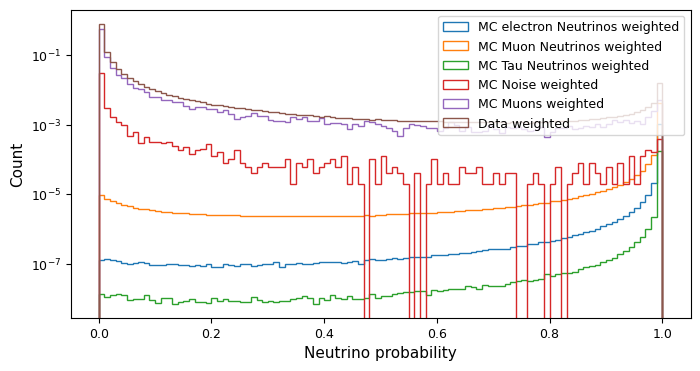

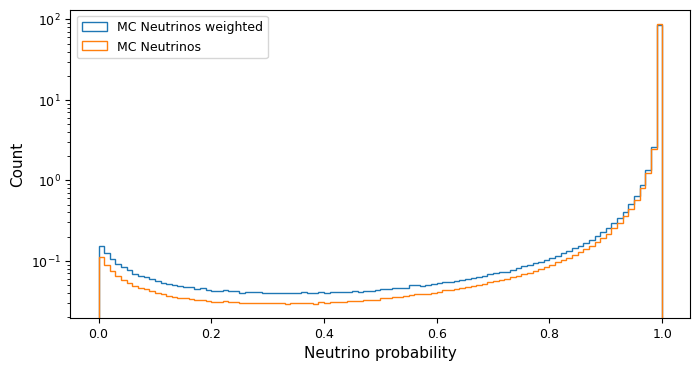

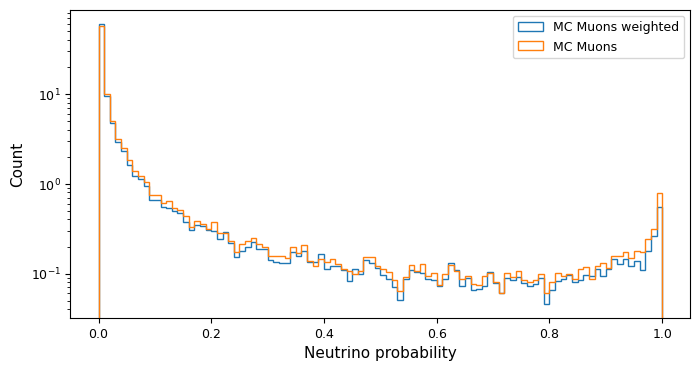

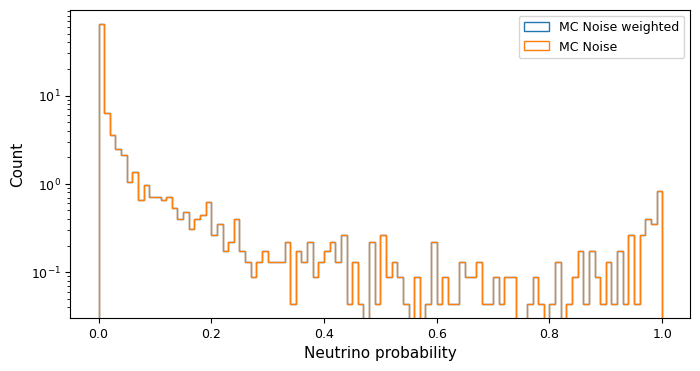

In [58]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC electron Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-14,14))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Muon Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-14,14))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-16,16))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Tau Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-16,16))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=1,histtype='step',label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_test_weights, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_use,density=False,alpha=1,histtype='step',label='Data weighted',weights=multiclass_RD['osc_weight'])

axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()



bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_test_weights, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Neutrinos weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_test, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Neutrinos')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()
print(counts_test_weights[:10])
print(counts_test[:10])

fig,axs =  plt.subplots(figsize=(8, 4))
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Muons weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Muons')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig,axs =  plt.subplots(figsize=(8, 4))
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Noise weighted',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=True,alpha=1,histtype='step',label='MC Noise')
axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

[2.50310888 1.30521229 1.69141798]
True


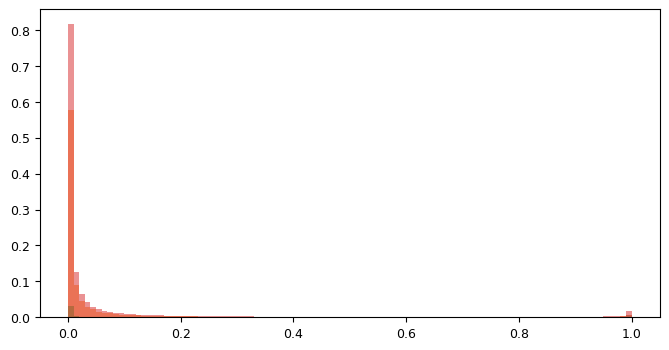

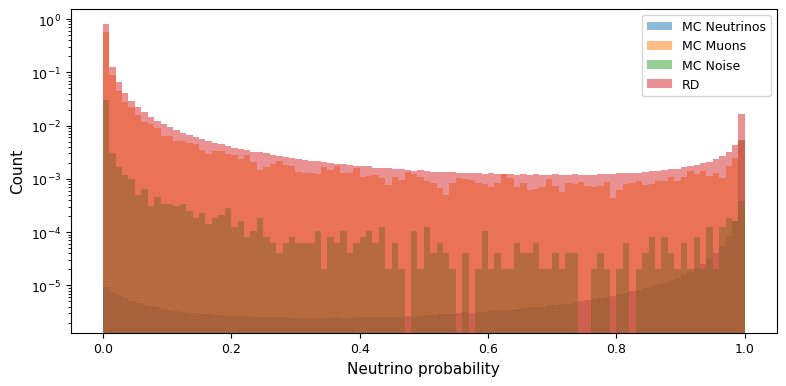

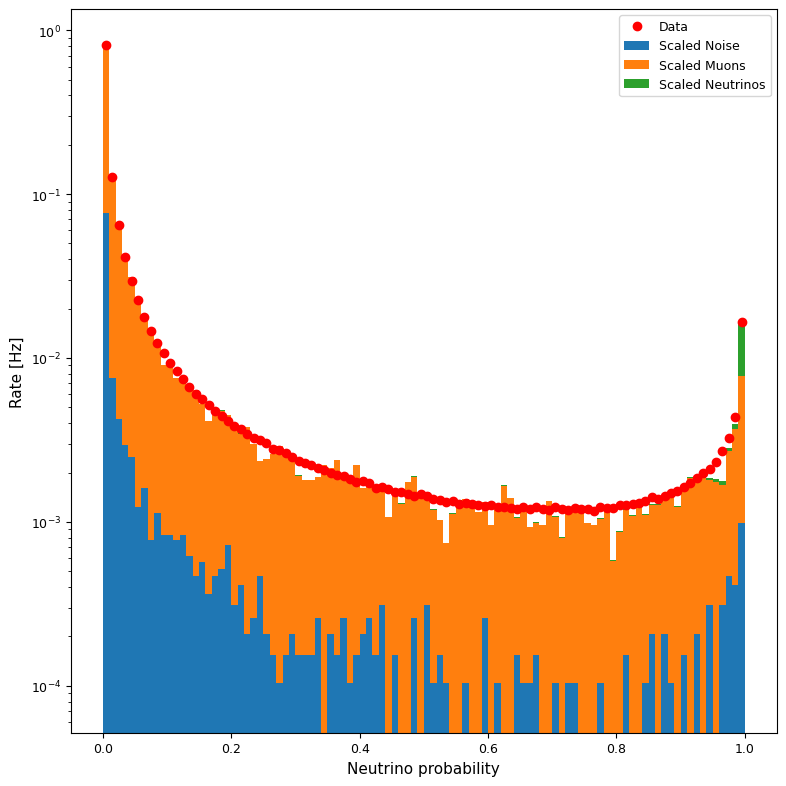

In [59]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = np.linspace(0,1,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])



fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()


def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/counts_RD_fit[i]
    return sum

N_0 = [1,1,1]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#


bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 8))


axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


axs.plot(bins_middle,counts_RD,'o',label='Data',color='red')
axs.set_xlabel('Neutrino probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

In [60]:
def to_logit(p):
    eps = 0.0000001
    try:
        if np.isnan(p):
            return
        p = p*(1-2*eps)+eps
        logit = np.log(p/(1-p))
    except ZeroDivisionError as e:
        print(e)
    return logit

safe_load_place_MC = "/groups/icecube/peter/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Final_plotting_Peter/New_muon_db/with_lvl_3_taken_care_off/Neutrino_prob_logit_MC_lvl_3.csv"
load_logit_MC = False
if load_logit_MC:
    input = pd.read_csv(safe_load_place_MC)
    multiclass_MC['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)
    multiclass_MC['pid_neutrino_pred_logit'].to_csv(safe_load_place_MC)
#multiclass_MC['pid_neutrino_pred_logit'] = pd.Series(multiclass_MC['pid_neutrino_pred']).apply(to_logit)



safe_load_place_RD = "/groups/icecube/peter/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/Final_plotting_Peter/New_muon_db/with_lvl_3_taken_care_off/Neutrino_prob_logit_RD_lvl_3.csv"
load_logit_RD = False
if load_logit_RD:
    input = pd.read_csv(safe_load_place_RD)
    multiclass_RD['pid_neutrino_pred_logit'] = input['pid_neutrino_pred_logit']
else:
    multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)
    multiclass_RD['pid_neutrino_pred_logit'].to_csv(safe_load_place_RD)
#multiclass_RD['pid_neutrino_pred_logit'] = pd.Series(multiclass_RD['pid_neutrino_pred']).apply(to_logit)


In [61]:
print(multiclass_MC['pid_neutrino_pred_logit'])

1           10.701469
2           16.118096
4           15.333239
5           13.118694
11          10.819361
              ...    
37235775     6.293471
37235777    -3.083638
37235778    16.118096
37235779    16.118096
37235781     7.101512
Name: pid_neutrino_pred_logit, Length: 25074974, dtype: float64


[0.00000000e+00 2.99605250e-05 1.41468126e-05 1.27347732e-05
 1.30656016e-05 1.42564109e-05 1.58760264e-05 1.81374779e-05
 2.12550900e-05 2.49778830e-05]
[0.12010728 1.42135429 1.42506089]
True


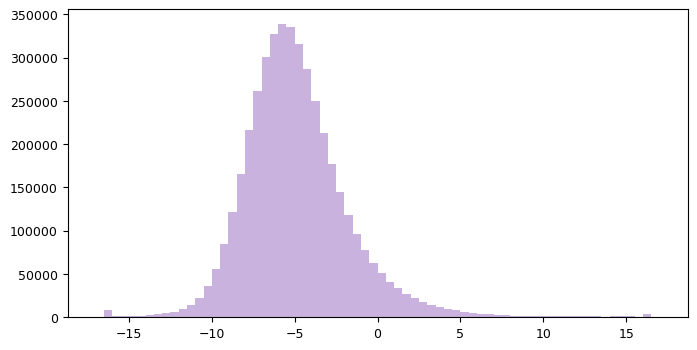

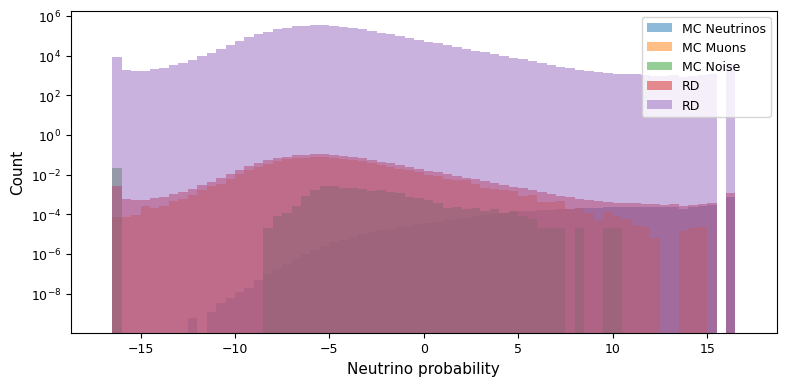

In [62]:
bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = bins_to_use#np.linspace(-17,17,101)

fig,axs =  plt.subplots(figsize=(8, 4))
counts_neutrino_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise_fit, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_fit,density=False,alpha=0.5,label='MC Noise',weights = multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD_fit, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD',weights=multiclass_RD['osc_weight'])
counts_RD_fit_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_fit,density=False,alpha=0.5,label='RD')


fig, axs = plt.subplots(figsize=(8, 4))


bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

counts_neutrino, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))],bins=bins_to_use,density=False,alpha=0.5,label='MC Neutrinos',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-12,12,-14,14,-16,16))])
counts_muon, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-13,13))],bins=bins_to_use,density=False,alpha=0.5,label='MC Muons',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-13,13))])
counts_noise, _,_ = axs.hist(multiclass_MC['pid_neutrino_pred_logit'][multiclass_MC['pid'].isin((-1,1))],bins=bins_to_use,density=False,alpha=0.5,label='MC Noise',weights=multiclass_MC['osc_weight'][multiclass_MC['pid'].isin((-1,1))])
counts_RD, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD',weights = multiclass_RD['osc_weight'])
counts_RD_not_rate, _,_ = axs.hist(multiclass_RD['pid_neutrino_pred_logit'],bins=bins_to_use,density=False,alpha=0.5,label='RD')


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Neutrino probability')
axs.legend()

fig.tight_layout()

multiclass_uncertainty_RD_fit = np.zeros_like(counts_RD_fit_not_rate)
for i in range(len(multiclass_uncertainty_RD_fit)):
    if counts_RD_fit_not_rate[i]!= 0 :
        multiclass_uncertainty_RD_fit[i] = (1/np.sqrt(counts_RD_fit_not_rate[i])) * counts_RD_fit[i]

print(multiclass_uncertainty_RD_fit[:10])

def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if counts_RD_fit[i] != 0:
            sum+= (counts_RD_fit[i] - N_scalers[0]*counts_noise_fit[i] - N_scalers[1]*counts_muon_fit[i] - N_scalers[2]*counts_neutrino_fit[i])**2/multiclass_uncertainty_RD_fit[i]**2
    return sum

N_0 = [ 1.69090118, 17.63873833,  0.03073277]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None),(0, None), (0, None)))
print(res.x)
print(res.success)

counts_noise_plot = counts_noise*res.x[0]#
counts_muon_plot = counts_muon*res.x[1]##
counts_neutrino_plot = counts_neutrino*res.x[2]#*#



bin_width = bins_to_use[1]-bins_to_use[0]



# fig, axs = plt.subplots(figsize=(8, 5))


# axs.bar(bins_middle,counts_noise_plot,width=bin_width,label='Scaled Noise')
# axs.bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='Scaled Muons')
# axs.bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='Scaled Neutrinos')


# axs.plot(bins_middle,counts_RD,'o',label='Data',color='red')
# axs.set_xlabel('Neutrino probability')
# axs.set_ylim(bottom=10**-5)
# axs.set_ylabel('Rate [Hz]')
# axs.set_yscale('log')
# axs.legend(loc='upper right')

# fig.tight_layout()




In [63]:
Neutrino_cut = 12
pure_neutrino_selection_RD = multiclass_RD['event_no'][multiclass_RD['pid_neutrino_pred_logit'] > Neutrino_cut]
pure_neutrino_selection_MC_noise_and_muons = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-13,13,-1,1)))]
pure_neutrino_selection_MC = multiclass_MC['event_no'][(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-12,12,-14,14,-16,16)))]
print('There are this many muons and noise selected away:',len(pure_neutrino_selection_MC_noise_and_muons))
print(multiclass_MC['pid'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())].value_counts())

There are this many muons and noise selected away: 4
 14.0    3873244
 16.0    1939602
-14.0    1716965
 12.0    1681611
-12.0     745346
-16.0     732210
Name: pid, dtype: int64


In [64]:
sneaky_muons = multiclass_MC[(multiclass_MC['pid_neutrino_pred_logit'] > Neutrino_cut) & (multiclass_MC['pid'].isin((-13,13,-1,1)))]
sneaky_muons['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['zenith'] = zenith_MC['zenith'][zenith_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['zenith_pred'] = zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['azimuth'] = azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['azimuth_pred'] = azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
sneaky_muons['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
print(sneaky_muons.head(4))

/tmp/ipykernel_10789/4130854352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaky_muons['energy'] = energy_MC['energy'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
/tmp/ipykernel_10789/4130854352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaky_muons['energy_pred'] = energy_MC['energy_pred'][energy_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]
/tmp/ipykernel_10789/4130854352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

          Unnamed: 0  pid_noise_pred  pid_muon_pred  pid_neutrino_pred   pid  \
1914284      5861569    3.309268e-14   1.191211e-06           0.999999  13.0   
8849157     24284934    1.821025e-15   2.955644e-07           1.000000  13.0   
35066641    17977297    5.788667e-20   6.506573e-07           0.999999  13.0   
35963445    21165363    9.016794e-14   4.572803e-06           0.999995  13.0   

            event_no  osc_weight  pid_neutrino_pred_logit      energy  \
1914284    1995276.0    0.000014                13.559246  181.270393   
8849157    9236982.0    0.000024                14.898982  219.173837   
35066641  36628082.0    0.000022                14.177849  291.446937   
35963445  37560539.0    0.000007                12.282959  221.859424   

          energy_pred    zenith  zenith_pred   azimuth  azimuth_pred  \
1914284     30.247765  1.048963     2.250636  0.273247      0.095266   
8849157     40.188942  0.898164     0.918870  0.124282      0.148466   
35066641    76.56

/tmp/ipykernel_10789/4130854352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sneaky_muons['track_mu_pred'] = track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(sneaky_muons['event_no'].to_list())]


In [65]:
print('this is the rate of muons surviving',np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC_noise_and_muons.to_list())]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_neutrino_selection_MC.to_list())]))
print(len(pure_neutrino_selection_MC))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_neutrino_selection_RD.to_list())]))
print(len(pure_neutrino_selection_RD))

this is the rate of muons surviving 6.682139306877526e-05
0.002463120760922312
10688978
0.0033276344306002676
10501


In [66]:
print('this many pure neutrinos RD',len(pure_neutrino_selection_RD))
print('this many pure neutrinos MC',len(pure_neutrino_selection_MC))
track_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==1]
cascade_event_no = track_cascade_MC['event_no'][track_cascade_MC['track_mu']==0]

pure_neutrino_track_selection = track_event_no[track_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)

pure_neutrino_cascade_selection = cascade_event_no[cascade_event_no.isin((pure_neutrino_selection_MC))].reset_index(drop=True)
#print(track_event_no)
#print(cascade_event_no)

this many pure neutrinos RD 10501
this many pure neutrinos MC 10688978


In [67]:
print(np.sum(multiclass_RD['osc_weight'])/np.sum(multiclass_MC['osc_weight']))

1.3685299598359293


In [68]:
from scipy import stats as sci


[     0.   8939.   1993.   1615.   1700.   2024.   2510.   3276.   4499.
   6213.   9227.  14108.  22714.  35680.  55682.  84516. 121708. 165949.
 215897. 260815. 300821. 326695. 338834. 335364. 315338. 286824. 249864.
 212755. 176936. 144953. 117907.  95757.  77531.  62509.  50582.]
[ 0.         94.54628496 44.64302857 40.18706259 41.23105626 44.98888752
 50.0999002  57.23635209 67.07458535 78.8225856 ]
[0.         0.01057683 0.02239991 0.02488363 0.02425356 0.02222771
 0.01996012 0.01747141 0.01490878 0.01268672]
[0.00000000e+00 2.99605250e-05 1.41468126e-05 1.27347732e-05
 1.30656016e-05 1.42564109e-05 1.58760264e-05 1.81374779e-05
 2.12550900e-05 2.49778830e-05]
25163.965619264287
25163.965619264287
0.0


/tmp/ipykernel_10789/1946133979.py:24: RuntimeWarning: invalid value encountered in divide
  multiclass_logit_ratio = counts_RD/(counts_noise_plot + counts_muon_plot + counts_neutrino_plot)


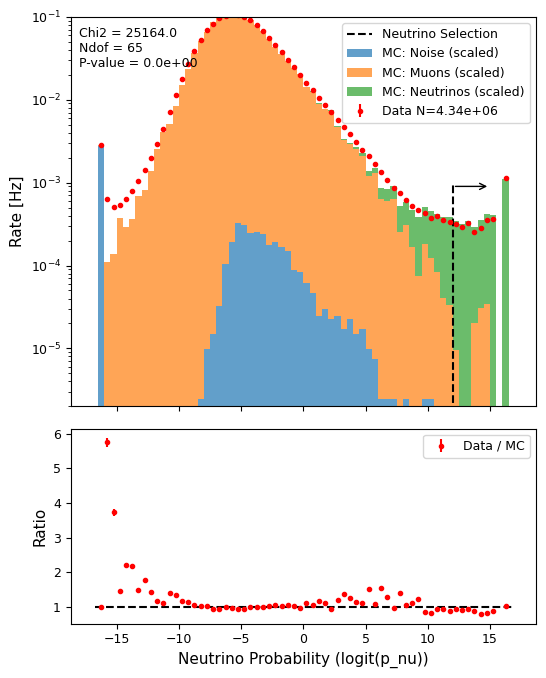

In [69]:

bins_to_use = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_to_fit = np.linspace(-17,17,69)#np.linspace(-17,17,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2



print(counts_RD_not_rate[:35])
RD_uncertainties_on_count = np.sqrt(counts_RD_not_rate)
print(RD_uncertainties_on_count[:10])
RD_percent_uncertainty_on_count = np.zeros_like(RD_uncertainties_on_count)
RD_uncertainties_on_rate = np.zeros_like(RD_uncertainties_on_count)

for i in range(len(RD_uncertainties_on_count)):
    if RD_uncertainties_on_count[i] == 0:
        RD_uncertainties_on_rate[i] = 0
        RD_percent_uncertainty_on_count[i] = 0
    else:
        RD_percent_uncertainty_on_count[i] = RD_uncertainties_on_count[i]/counts_RD_not_rate[i]
        RD_uncertainties_on_rate[i] = counts_RD[i]*RD_percent_uncertainty_on_count[i]

print(RD_percent_uncertainty_on_count[:10])
print(RD_uncertainties_on_rate[:10])

multiclass_logit_ratio = counts_RD/(counts_noise_plot + counts_muon_plot + counts_neutrino_plot)
multiclass_logit_ratio_uncertainties = multiclass_logit_ratio*RD_percent_uncertainty_on_count

multiclass_logit_residual = counts_RD - (counts_noise_plot + counts_muon_plot + counts_neutrino_plot)
multiclass_logit_chi_2 = 0
for i in range(len(multiclass_logit_residual)):
    if RD_uncertainties_on_rate[i] !=0:
        multiclass_logit_chi_2 += (multiclass_logit_residual[i]/RD_uncertainties_on_rate[i])**2
print(multiclass_logit_chi_2)
multiclass_logit_ndof = len(bins_middle) - 3
print(multiclass_logit_chi_2)
multiclass_logit_p_value = sci.chi2.sf(multiclass_logit_chi_2,multiclass_logit_ndof)
print(multiclass_logit_p_value)

figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])
bins_to_use = np.linspace(-17,17,69)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

axs[0].bar(bins_middle,counts_noise_plot,width=bin_width,label='MC: Noise (scaled)',alpha=0.7)
axs[0].bar(bins_middle,counts_muon_plot,width=bin_width,bottom=counts_noise_plot,label='MC: Muons (scaled)',alpha=0.7)
axs[0].bar(bins_middle,counts_neutrino_plot,width=bin_width,bottom=counts_noise_plot+counts_muon_plot,label='MC: Neutrinos (scaled)',alpha=0.7)
axs[0].errorbar(x=bins_middle,y=counts_RD,yerr=RD_uncertainties_on_rate,fmt='.',label='Data N={:.2e}'.format(int(np.sum(counts_RD_not_rate))),color='red')
axs[0].vlines(Neutrino_cut,0,10**(-3),color='black',label='Neutrino Selection',linestyles='dashed')

axs[0].set_ylabel('Rate [Hz]')
axs[0].set_yscale('log')
axs[0].set_ylim(top=0.1,bottom=2*10**(-6))
#axs[0].set_xlim(-17,17)
axs[0].legend(loc='upper right')
axs[0].annotate("", xy=(Neutrino_cut+3, 0.9*10**(-3)), xytext=(Neutrino_cut, 0.9*10**(-3)),
            arrowprops=dict(arrowstyle="->"))
axs[0].text(-18, 0.025, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.1e}'.format(multiclass_logit_chi_2,multiclass_logit_ndof,multiclass_logit_p_value),fontsize=9)
axs[1].set_xlabel('Neutrino Probability (logit(p_nu))')
axs[1].set_ylabel('Ratio')
axs[1].errorbar(bins_middle,multiclass_logit_ratio,yerr=multiclass_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs[1].hlines(1,np.min(bins_middle),np.max(bins_middle),color='k',linestyles='dashed')
axs[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'multiclass_neutrino_prob.png',bbox_inches='tight',dpi=1200)

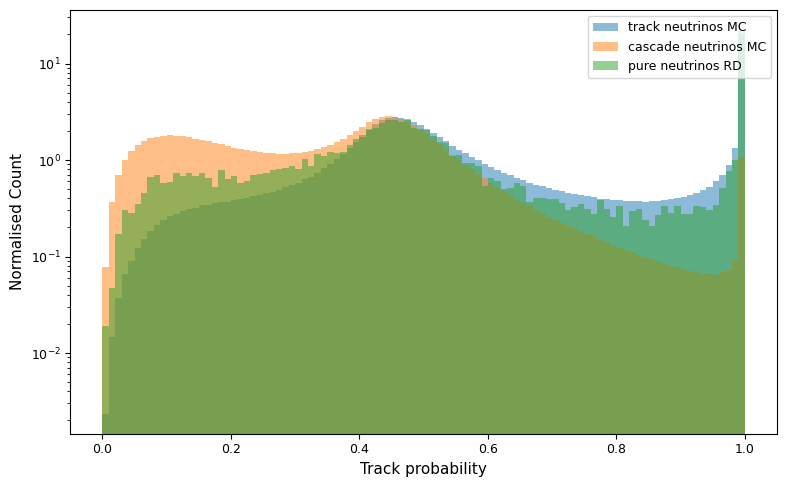

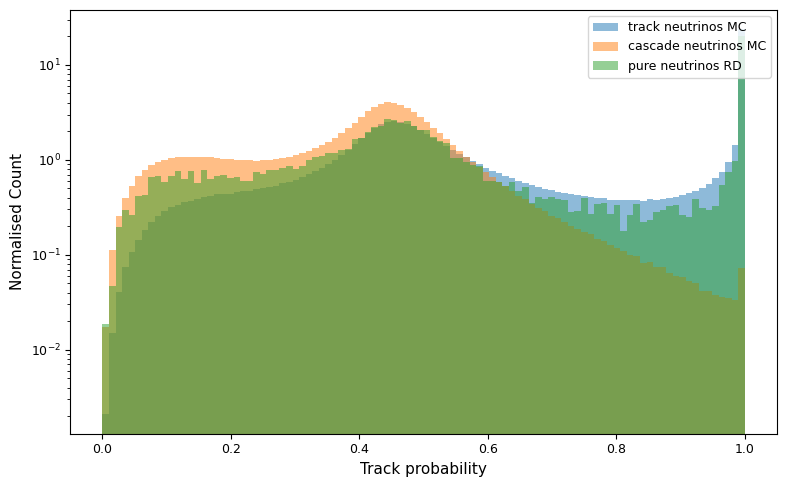

In [70]:
fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,101)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='track neutrinos MC',alpha=0.5)#,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5)#,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5)#,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

fig, axs = plt.subplots(figsize=(8, 5))

bins_to_use = np.linspace(0,1,99)
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=True,bins=bins_to_use,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ],density=True,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection) ])
axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=True,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])

axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Normalised Count')
axs.set_yscale('log')
axs.legend(loc='upper right')

fig.tight_layout()

[1.4441937  1.05980868]
True


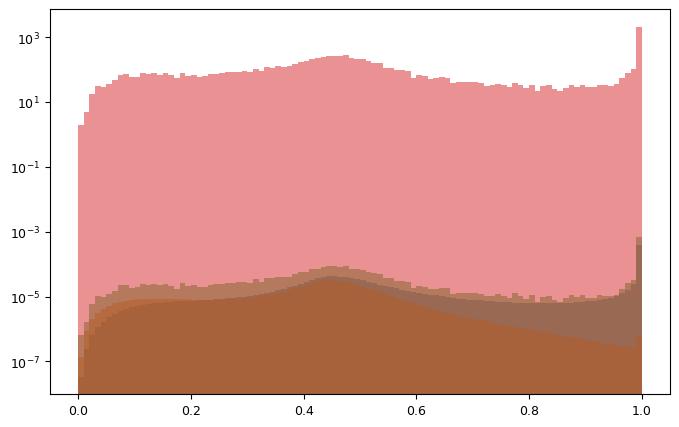

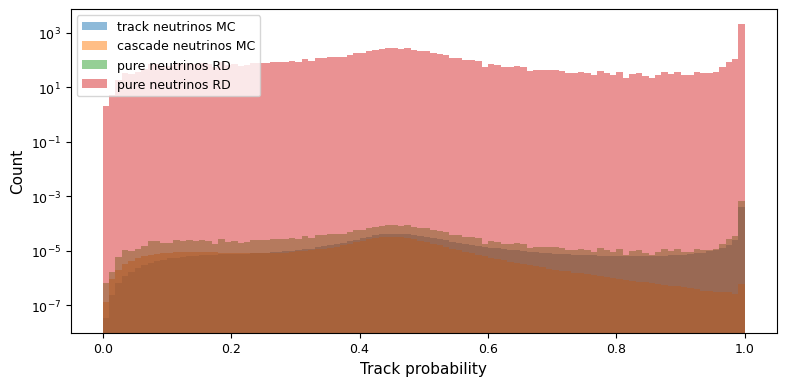

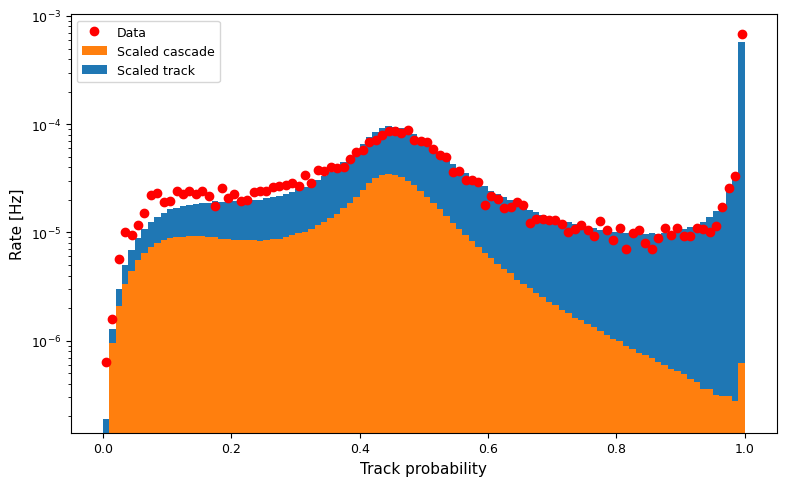

In [71]:
bins_to_use = np.linspace(0,1,101)
bins_to_fit = bins_to_use#np.linspace(0.01,0.99,99)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2

fig, axs = plt.subplots(figsize=(8, 5))

counts_track_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_fit,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade_fit, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_fit,label='cascade neutrinos MC',alpha=0.5,weights = track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
TC_counts_RD_fit, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_fit,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])
TC_counts_RD_fit_not_rate, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_fit,label='pure neutrinos RD',alpha=0.5)

axs.set_yscale('log')

fig, axs = plt.subplots(figsize=(8, 4))


counts_track, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)],density=False,bins=bins_to_use,label='track neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_track_selection)])
counts_cascade, _,_ = axs.hist(track_cascade_MC['track_mu_pred'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)],density=False,bins=bins_to_use,label='cascade neutrinos MC',alpha=0.5,weights=track_cascade_MC['osc_weight'][track_cascade_MC['event_no'].isin(pure_neutrino_cascade_selection)])
TC_counts_RD, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5,weights=track_cascade_RD['osc_weight'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)])
TC_counts_RD_not_rate, _,_ = axs.hist(track_cascade_RD['track_mu_pred'][track_cascade_RD['event_no'].isin(pure_neutrino_selection_RD)],density=False,bins=bins_to_use,label='pure neutrinos RD',alpha=0.5)


axs.set_yscale('log')
axs.set_ylabel('Count')
axs.set_xlabel('Track probability')
axs.legend()

fig.tight_layout()

TC_uncertainty_RD_fit = np.zeros_like(TC_counts_RD_fit_not_rate)
for i in range(len(TC_uncertainty_RD_fit)):
    if TC_counts_RD_fit_not_rate[i]!= 0 :
        TC_uncertainty_RD_fit[i] = (1/np.sqrt(TC_counts_RD_fit_not_rate[i])) * TC_counts_RD_fit[i]

def chi_square(N_scalers):
    sum = 0
    for i in range(len(bins_to_fit)-1):
        if TC_counts_RD_fit[i] != 0:
            sum+= (TC_counts_RD_fit[i] - N_scalers[0]*counts_track_fit[i] - N_scalers[1]*counts_cascade_fit[i])**2/TC_uncertainty_RD_fit[i]**2
    return sum

N_0 = [50,50]
res = optimize.minimize(chi_square,N_0,bounds = ((0, None), (0, None)))
print(res.x)
print(res.success)

counts_track_plot = counts_track*res.x[0]#
counts_cascade_plot = counts_cascade*res.x[1]##

bin_width = bins_to_use[1]-bins_to_use[0]

fig, axs = plt.subplots(figsize=(8, 5))


axs.bar(bins_middle,counts_cascade_plot,width=bin_width,label='Scaled cascade',color='C1')
axs.bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='Scaled track',color='C0')


axs.plot(bins_middle,TC_counts_RD,'o',label='Data',color='red')
axs.set_xlabel('Track probability')
#axs.set_ylim(bottom=1000)
axs.set_ylabel('Rate [Hz]')
axs.set_yscale('log')
axs.legend(loc='upper left')

fig.tight_layout()


In [72]:
track_cut = 0.9
cascade_cut = 0.5
pure_track_event_no_MC = track_cascade_MC['event_no'][(track_cascade_MC['track_mu_pred']>track_cut)]# & (track_cascade_MC['track_mu_pred'] < track_cut_2) ]
pure_track_event_no_RD = track_cascade_RD['event_no'][(track_cascade_RD['track_mu_pred']>track_cut)]# & (track_cascade_RD['track_mu_pred'] < track_cut_2)]


pure_cascade_event_no_MC = track_cascade_MC['event_no'][track_cascade_MC['track_mu_pred']<cascade_cut]
pure_cascade_event_no_RD = track_cascade_RD['event_no'][track_cascade_RD['track_mu_pred']<cascade_cut]


pure_track_selection_MC = pure_track_event_no_MC[pure_track_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_track_selection_RD = pure_track_event_no_RD[pure_track_event_no_RD.isin(pure_neutrino_selection_RD)]


pure_cascade_selection_MC = pure_cascade_event_no_MC[pure_cascade_event_no_MC.isin(pure_neutrino_selection_MC)]
pure_cascade_selection_RD = pure_cascade_event_no_RD[pure_cascade_event_no_RD.isin(pure_neutrino_selection_RD)]

print(len(pure_track_selection_MC))
print(len(pure_track_selection_RD))
print(len(pure_cascade_selection_MC))
print(len(pure_cascade_selection_RD))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_track_selection_MC.to_list())]))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_track_selection_RD.to_list())]))
print(np.sum(multiclass_MC['osc_weight'][multiclass_MC['event_no'].isin(pure_cascade_selection_MC.to_list())]))
print(np.sum(multiclass_RD['osc_weight'][multiclass_RD['event_no'].isin(pure_cascade_selection_RD.to_list())]))

1529751
2566
6686590
5480
0.0005077957996612002
0.0008131330300847812
0.0013326918149524198
0.0017365428701732663


[  2.   5.  18.  32.  30.  37.  48.  70.  73.  60.  62.  77.  72.  77.
  71.  77.  69.  55.  82.  66.  71.  61.  63.  74.  76.  77.  83.  84.
  86.  91.  85. 108.  90. 120. 116.]
[1.41421356 2.23606798 4.24264069 5.65685425 5.47722558 6.08276253
 6.92820323 8.36660027 8.54400375 7.74596669]
[0.70710678 0.4472136  0.23570226 0.1767767  0.18257419 0.16439899
 0.14433757 0.11952286 0.11704115 0.12909944]
[4.48146438e-07 7.08581734e-07 1.34443931e-06 1.79258575e-06
 1.73566369e-06 1.92755071e-06 2.19546020e-06 2.65127008e-06
 2.70748700e-06 2.45459913e-06]
253.7106926345537
253.7106926345537
9.453659085531271e-16


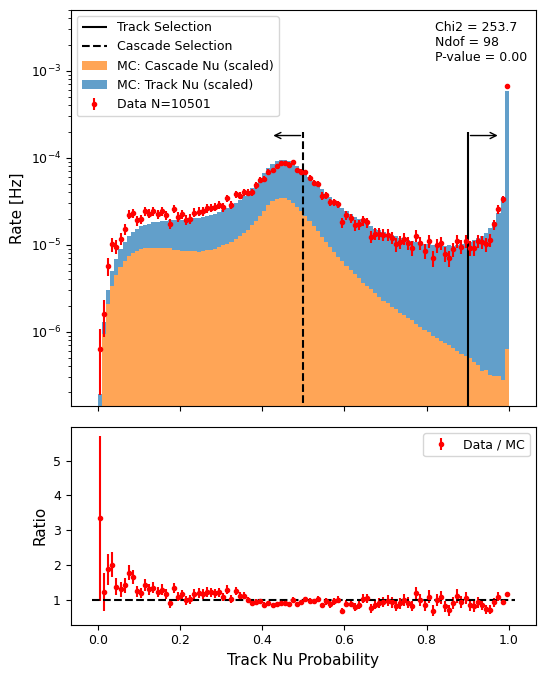

In [73]:
bins_to_use = np.linspace(0,1,101)
bins_middle = (bins_to_use[1:]+bins_to_use[:-1])/2
bin_width = bins_to_use[1]-bins_to_use[0]

print(TC_counts_RD_not_rate[:35])
TC_RD_uncertainties_on_count = np.sqrt(TC_counts_RD_not_rate)
print(TC_RD_uncertainties_on_count[:10])
TC_RD_percent_uncertainty_on_count = np.zeros_like(TC_RD_uncertainties_on_count)
TC_RD_uncertainties_on_rate = np.zeros_like(TC_RD_uncertainties_on_count)

for i in range(len(TC_RD_uncertainties_on_count)):
    if TC_RD_uncertainties_on_count[i] == 0:
        TC_RD_uncertainties_on_rate[i] = 0
        TC_RD_percent_uncertainty_on_count[i] = 0
    else:
        TC_RD_percent_uncertainty_on_count[i] = TC_RD_uncertainties_on_count[i]/TC_counts_RD_not_rate[i]
        TC_RD_uncertainties_on_rate[i] = TC_counts_RD[i]*TC_RD_percent_uncertainty_on_count[i]

print(TC_RD_percent_uncertainty_on_count[:10])
print(TC_RD_uncertainties_on_rate[:10])

TC_logit_ratio = TC_counts_RD/(counts_track_plot + counts_cascade_plot)
TC_logit_ratio_uncertainties = TC_logit_ratio*TC_RD_percent_uncertainty_on_count

TC_logit_residual = TC_counts_RD - (counts_track_plot + counts_cascade_plot)
TC_logit_chi_2 = 0
for i in range(len(TC_logit_residual)):
    if TC_RD_uncertainties_on_rate[i] !=0:
        TC_logit_chi_2 += (TC_logit_residual[i]/TC_RD_uncertainties_on_rate[i])**2
print(TC_logit_chi_2)
TC_logit_ndof = len(bins_middle)-2
print(TC_logit_chi_2)
TC_logit_p_value = sci.chi2.sf(TC_logit_chi_2,TC_logit_ndof)
print(TC_logit_p_value)








figure_size = set_size('thesis',subplots = (2,1))
figure_size_yfrac = 1
fig, axs2 = plt.subplots(2,1,figsize=(figure_size[0],figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[2, 1])


axs2[0].bar(bins_middle,counts_cascade_plot,width=bin_width,label='MC: Cascade Nu (scaled)',color='C1',alpha=0.7)
axs2[0].bar(bins_middle,counts_track_plot,width=bin_width,bottom=counts_cascade_plot,label='MC: Track Nu (scaled)',color='C0',alpha=0.7)
axs2[0].errorbar(bins_middle,TC_counts_RD,yerr=TC_RD_uncertainties_on_rate,fmt='.',label='Data N={}'.format(int(np.sum(TC_counts_RD_not_rate))),color='red')
axs2[0].vlines(track_cut,0,2*10**-4,color='black',label='Track Selection')
axs2[0].vlines(cascade_cut,0,2*10**-4,color='black',linestyle='dashed',label='Cascade Selection')

axs2[0].set_ylabel('Rate [Hz]')
axs2[0].set_yscale('log')
axs2[0].legend(loc='upper left')
axs2[0].set_ylim(top=0.5*10**(-2))

axs2[0].text(0.82, 1.3*10**(-3), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(TC_logit_chi_2,TC_logit_ndof,TC_logit_p_value),fontsize=9)

axs2[0].annotate("", xy=(track_cut+0.08, 2*0.9*10**(-4)), xytext=(track_cut, 2*0.9*10**(-4)),
             arrowprops=dict(arrowstyle="->"))
axs2[0].annotate("", xy=(cascade_cut-0.08, 2*0.9*10**(-4)), xytext=(cascade_cut, 2*0.9*10**(-4)),
             arrowprops=dict(arrowstyle="->"))

axs2[1].set_xlabel('Track Nu Probability')
axs2[1].set_ylabel('Ratio')
axs2[1].errorbar(bins_middle,TC_logit_ratio,yerr=TC_logit_ratio_uncertainties,fmt='.',color='red',label='Data / MC')
axs2[1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
axs2[1].legend()

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'track_probability.png',bbox_inches='tight',dpi=1200)

In [74]:
print(TC_RD_uncertainties_on_rate[:10])
print(np.sqrt(TC_counts_RD[:10]))

[4.48146438e-07 7.08581734e-07 1.34443931e-06 1.79258575e-06
 1.73566369e-06 1.92755071e-06 2.19546020e-06 2.65127008e-06
 2.70748700e-06 2.45459913e-06]
[0.0007961  0.00125874 0.0023883  0.0031844  0.00308328 0.00342415
 0.00390008 0.00470979 0.00480965 0.00436042]


In [75]:
with_MC_truth = True

In [76]:
from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)

In [77]:
def uncertainties_from_counts_rates(counts,rates):
    uncertainties = np.zeros(len(counts))
    fractional_uncertainty = np.zeros(len(counts))
    for i in range(len(uncertainties)):
        if counts[i]!=0:
            uncertainties[i] = 1/np.sqrt(counts[i]) * rates[i]
            fractional_uncertainty[i] = 1/np.sqrt(counts[i])
    #print(uncertainties)
    return uncertainties,fractional_uncertainty

def chi2_calculation(MC_rates,RD_rates,RD_uncertainties,parameters=1):
    chi2 = 0
    ndof = len(MC_rates)-parameters
    for i in range(len(RD_rates)):
        if RD_rates[i]!=0 and MC_rates[i]!=0:
            chi2 += (RD_rates[i]-MC_rates[i])**2/RD_uncertainties[i]**2
    p_value = sci.chi2.sf(chi2,ndof)

    return chi2,ndof,p_value

scale = True
if scale == True:
    scale_track = np.sum(azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])/np.sum(azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)])
    print(scale_track)
    scale_cascade = np.sum(azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)])/np.sum(azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)])
    print(scale_cascade)
else:
    scale_track = 1
    scale_cascade = 1
# rates = np.array([6.97152247*10**(-6), 6.02086032*10**(-6)])
# counts = np.array([22,14])
# print(uncertainties_from_counts_rates(counts,rates))

1.6012992439624374
1.3030340928711002


138.13649180128965 79 4.386024131531982e-05
145.83093774173295 99 0.0015444792355388383


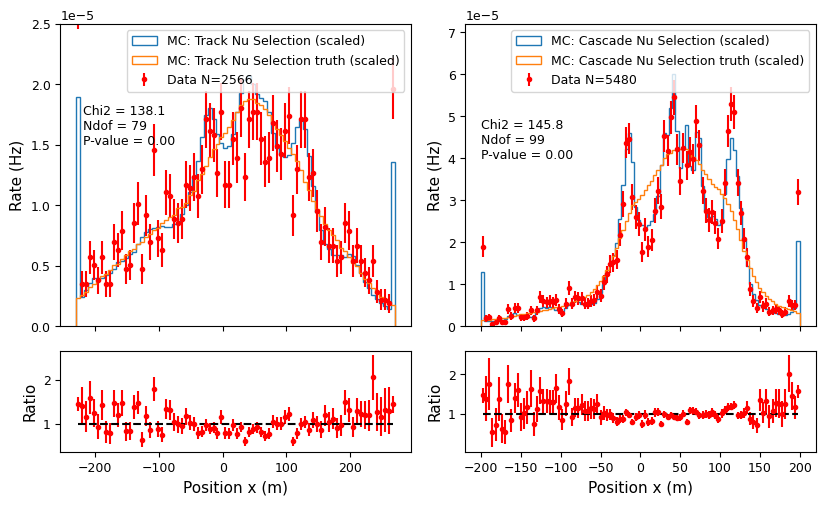

In [78]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)])
min_MC = np.min(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)])
bins=np.linspace(-230,270,81)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-230,270),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-230,270),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_track_selection_MC)],-230,270), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty
if with_MC_truth:
    axs[0,0].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)

axs[1,0].set_xlabel(r'Position x (m)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=2.5*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(-220, 1.5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
min_MC = np.min(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
bins=np.linspace(-200,200,101)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-200,200),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(position_RD['position_x_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-200,200),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(position_MC['position_x_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)],-200,200), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Position x (m)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=7.2*10**(-5))

axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
if with_MC_truth:
    axs[0,1].hist(position_MC['position_x'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[0,1].legend(loc='upper right')
cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(-200, 4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'position_x_track_cascade_rate_ratio.png',bbox_inches='tight')

121.62914046643486 79 0.0014742244730906466
157.78792071436328 99 0.00015861875505061065


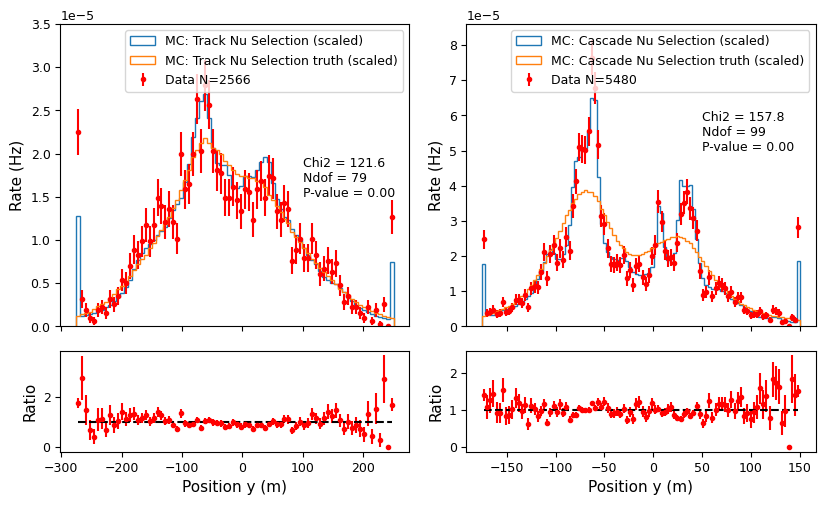

In [79]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)])
min_MC = np.min(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)])
bins=np.linspace(-275,250,81)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-275,250),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-275,250),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_track_selection_MC)],-275,250), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty
if with_MC_truth:
    axs[0,0].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)

axs[1,0].set_xlabel(r'Position y (m)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=3.5*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(100, 1.5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
min_MC = np.min(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
bins=np.linspace(-175,150,101)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-175,150),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(position_RD['position_y_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-175,150),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(position_MC['position_y_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)],-175,150), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Position y (m)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=8.6*10**(-5))

axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
if with_MC_truth:
    axs[0,1].hist(position_MC['position_y'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[0,1].legend(loc='upper right')
cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(50, 5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'position_y_track_cascade_rate_ratio.png',bbox_inches='tight')

202.7582457858201 79 7.787427987482443e-13
135.6331691547295 99 0.008568997922009065


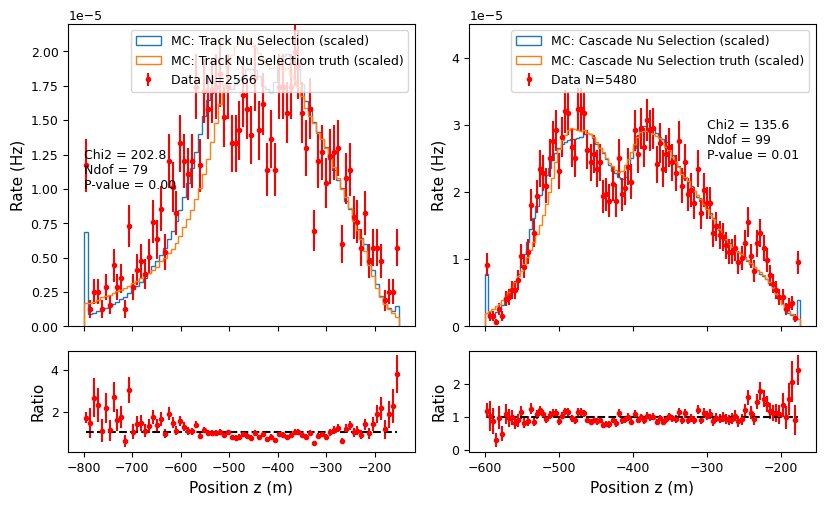

In [80]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)])
min_MC = np.min(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)])
bins=np.linspace(-800,-150,81)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-800,-150),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_track_selection_RD)],-800,-150),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_track_selection_MC)],-800,-150), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty
if with_MC_truth:
    axs[0,0].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)

axs[1,0].set_xlabel(r'Position z (m)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=2.2*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(-800, 1*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
min_MC = np.min(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)])
bins=np.linspace(-600,-175,101)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-600,-175),density=False,bins=bins,weights=position_RD['osc_weight'][position_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(position_RD['position_z_pred'][position_RD['event_no'].isin(pure_cascade_selection_RD)],-600,-175),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(position_MC['position_z_pred'][position_MC['event_no'].isin(pure_cascade_selection_MC)],-600,-175), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Position z (m)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=4.5*10**(-5))

axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')
if with_MC_truth:
    axs[0,1].hist(position_MC['position_z'][position_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=position_MC['osc_weight'][position_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[0,1].legend(loc='upper right')
cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(-300, 2.5*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'position_z_track_cascade_rate_ratio.png',bbox_inches='tight')

28.7826074026965 29 0.4764299179200716
52.99912222439711 49 0.322599807855152


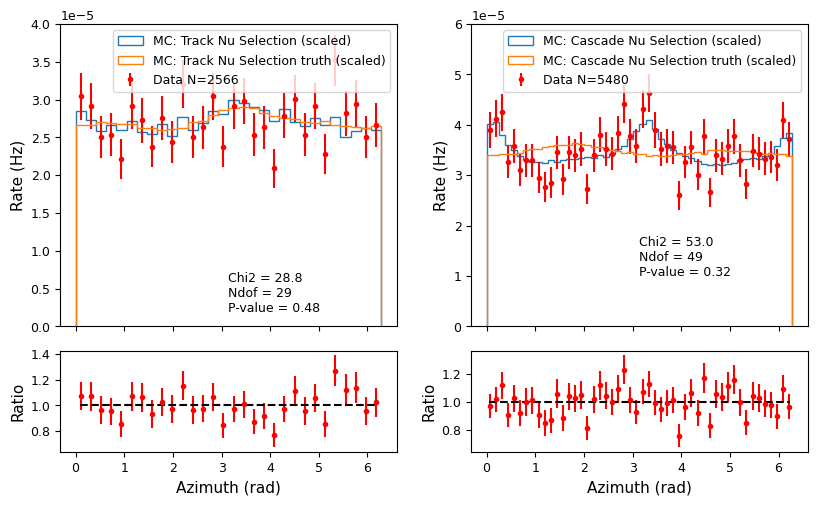

In [81]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])

bins=np.linspace(0,np.pi*2,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

if with_MC_truth:
    axs[0,0].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[1,0].set_xlabel('Azimuth (rad)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=4*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(np.pi, 0.2*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

bins=np.linspace(0,np.pi*2,51)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(azimuth_RD['azimuth_pred'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(azimuth_MC['azimuth_pred'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
if with_MC_truth:
    axs[0,1].hist(azimuth_MC['azimuth'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[1,1].set_xlabel('Azimuth (rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=6*10**(-5))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(np.pi, 1*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)

fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'azimuth_track_cascade_rate_ratio.png',bbox_inches='tight')

34.32070100467533 29 0.2277143887541171
54.72478739056162 29 0.0026674831187391756


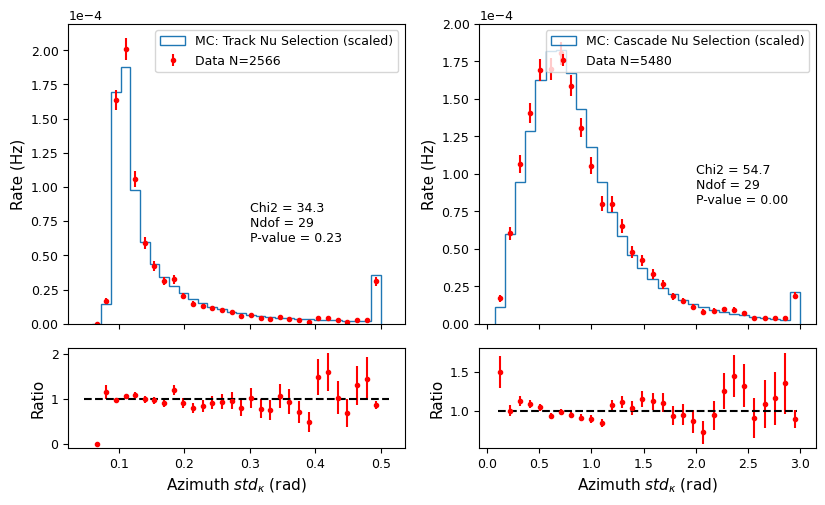

In [82]:


figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),0.5,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_track_selection_RD)]),0,0.5),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]),0,0.5), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[0,0].set_ylabel('Rate (Hz)')
#axs[0,0].set_ylim(top=4*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(0.3, 0.00006, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),3,31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,3),density=False,bins=bins,weights=azimuth_RD['osc_weight'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(1/np.sqrt(azimuth_RD['azimuth_kappa'][azimuth_RD['event_no'].isin(pure_cascade_selection_RD)]),0,3),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(1/np.sqrt(azimuth_MC['azimuth_kappa'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]),0,3), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=azimuth_MC['osc_weight'][azimuth_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Azimuth $std_{\kappa}$ (rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=0.0002)
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(2, 0.00008, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'azimuth_kappa_track_cascade_rate_ratio.png',bbox_inches='tight')

296.29077161292696 29 4.398222234320972e-46
178.37933316789793 29 2.002095296604575e-23


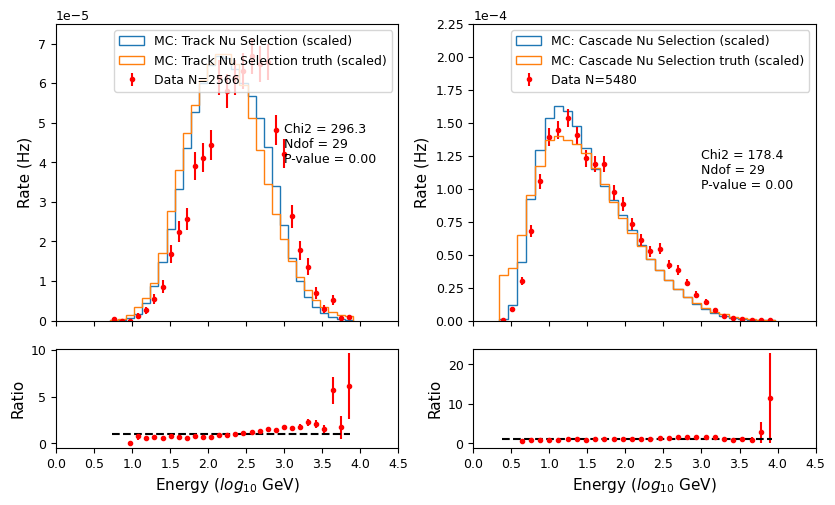

In [83]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])

track_max_MC = np.max(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]))
track_max_RD = np.max(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]))
track_min_MC = np.min(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]))
track_min_RD = np.min(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]))
track_max = np.min([track_max_MC,track_max_RD])
track_min = np.max([track_min_MC,track_min_RD])
bins=np.linspace(track_min,track_max,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),track_min,track_max),density=False,bins=bins,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_track_selection_RD)]),track_min,track_max),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_track_selection_MC)]),track_min,track_max), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

if with_MC_truth:
    axs[0,0].hist(np.clip(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_track_selection_MC)]),track_min,track_max), histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[1,0].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=7.5*10**(-5))
axs[0,0].set_xlim(0,4.5)
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle[2:],track_ratio[2:],yerr=track_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(3, 4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_max_MC = np.max(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]))
cascade_max_RD = np.max(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]))
cascade_min_MC = np.min(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]))
cascade_min_RD = np.min(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]))
cascade_max = np.min([cascade_max_MC,cascade_max_RD])
cascade_min = np.max([cascade_min_MC,cascade_min_RD])
bins=np.linspace(cascade_min,cascade_max,31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),cascade_min,cascade_max),density=False,bins=bins,weights=energy_RD['osc_weight'][energy_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(np.log10(energy_RD['energy_pred'][energy_RD['event_no'].isin(pure_cascade_selection_RD)]),cascade_min,cascade_max),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(np.log10(energy_MC['energy_pred'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),cascade_min,cascade_max), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
if with_MC_truth:
    axs[0,1].hist(np.clip(np.log10(energy_MC['energy'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]),cascade_min,cascade_max), histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=energy_MC['osc_weight'][energy_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[1,1].set_xlabel(r'Energy ($log_{10}$ GeV)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=0.000225)
axs[0,1].set_xlim(0,4.5)
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle[2:],cascade_ratio[2:],yerr=cascade_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(3, 0.0001, 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'energy_track_cascade_rate_ratio.png',bbox_inches='tight')

40.431149761926704 29 0.07713061428239545
83.43453657204388 29 3.6004800921547965e-07


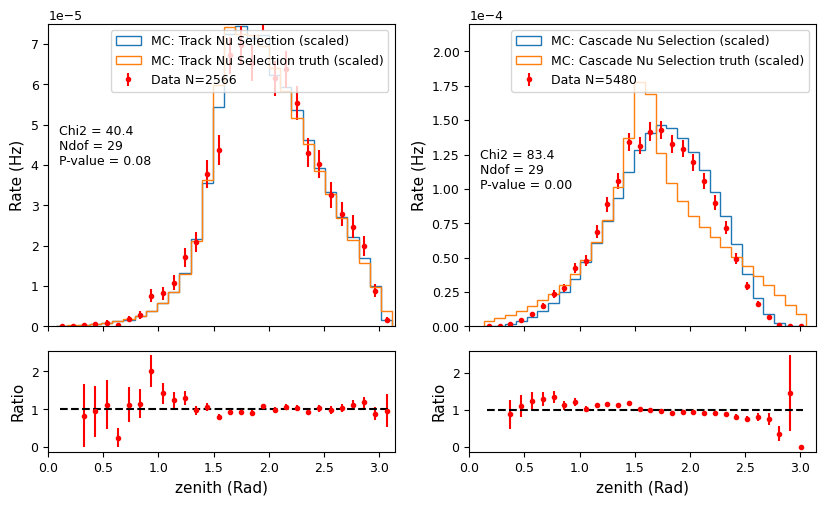

In [84]:
figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex=True,height_ratios=[3, 1])

track_max_MC = np.max(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
track_max_RD = np.max(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
track_min_MC = np.min(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)])
track_min_RD = np.min(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
bins=np.linspace(np.min([track_min_MC,track_min_RD]),np.max([track_max_MC,track_max_RD]),31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_track_selection_RD)],density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

if with_MC_truth:
    axs[0,0].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_track_selection_MC)], histtype='step',density=False,label='MC: Track Nu Selection truth (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[1,0].set_xlabel(r'zenith (Rad)')
axs[0,0].set_ylabel('Rate (Hz)')
axs[0,0].set_ylim(top=7.5*10**(-5))
axs[0,0].set_xlim(0,np.pi)
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle[2:],track_ratio[2:],yerr=track_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(0.1,4*10**(-5), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_max_MC = np.max(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
cascade_max_RD = np.max(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_min_MC = np.min(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)])
cascade_min_RD = np.min(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
bins=np.linspace(np.min([cascade_min_MC,cascade_min_RD]),np.max([cascade_max_MC,cascade_max_RD]),31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(zenith_RD['zenith_pred'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)],density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(zenith_MC['zenith_pred'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
if with_MC_truth:
    axs[0,1].hist(zenith_MC['zenith'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)], histtype='step',density=False,label='MC: Cascade Nu Selection truth (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)
axs[1,1].set_xlabel(r'zenith (Rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=2.2*10**(-4))
axs[0,1].set_xlim(0,np.pi)
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle[2:],cascade_ratio[2:],yerr=cascade_ratio_uncertainty[2:],label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(0.1,1*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'zenith_track_cascade_rate_ratio.png',bbox_inches='tight')

26.670074786379946 29 0.5895002475212748
26.609030340342933 29 0.5927899042037503


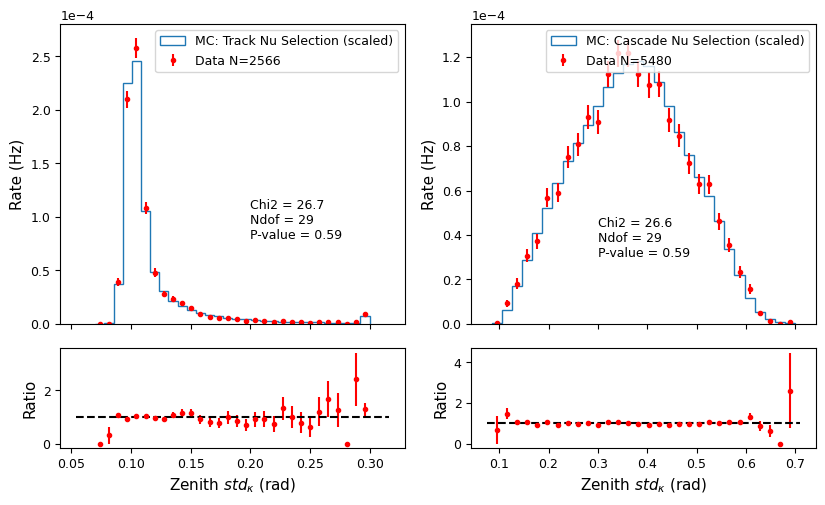

In [85]:

figure_size = set_size('thesis',subplots = (2,2))
figure_size_yfrac = 1.5
figure_size_xfrac = 1.5
fig, axs = plt.subplots(2,2,figsize=(figure_size[0]*figure_size_xfrac,figure_size[1]*figure_size_yfrac),sharex='col',height_ratios=[3, 1])

min_RD = np.min(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]))
min_MC = np.min(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),0.3,31)
bins_middle = (bins[1:] + bins[:-1])/2
track_rates, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3),density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_track_selection_RD)])
track_counts, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_track_selection_RD)]),0,0.3),density=False,bins=bins)
track_uncertainty,track_fractional_uncertainty = uncertainties_from_counts_rates(track_counts,track_rates)


track_rates_MC,_,_ = axs[0,0].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_track_selection_MC)]),0,0.3), histtype='step',density=False,label='MC: Track Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_track_selection_MC)]*scale_track)
axs[0,0].errorbar(bins_middle,track_rates,yerr=track_uncertainty,fmt='.',label='Data N={}'.format(len(pure_track_selection_RD)),color='red')
track_ratio = track_rates/track_rates_MC
track_ratio_uncertainty = track_ratio*track_fractional_uncertainty

axs[1,0].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[0,0].set_ylabel('Rate (Hz)')
#axs[0,0].set_ylim(top=4*10**(-5))
axs[0,0].legend(loc='upper right')

axs[1,0].errorbar(bins_middle,track_ratio,yerr=track_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,0].set_ylabel('Ratio')

track_chi2,track_ndof,track_p_value = chi2_calculation(track_rates_MC,track_rates,track_uncertainty)
print(track_chi2,track_ndof,track_p_value)
axs[0,0].text(0.2, 0.8*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(track_chi2,track_ndof,track_p_value),fontsize=9)
axs[1,0].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

min_RD = np.min(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]))
min_MC = np.min(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]))
bins=np.linspace(np.min([min_RD,min_MC]),0.7,31)
bins_middle = (bins[1:] + bins[:-1])/2

cascade_rates, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.7),density=False,bins=bins,weights=zenith_RD['osc_weight'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)])
cascade_counts, _ = np.histogram(np.clip(1/np.sqrt(zenith_RD['zenith_kappa'][zenith_RD['event_no'].isin(pure_cascade_selection_RD)]),0,0.7),density=False,bins=bins)
cascade_uncertainty,cascade_fractional_uncertainty = uncertainties_from_counts_rates(cascade_counts,cascade_rates)



cascade_rates_MC,_,_ = axs[0,1].hist(np.clip(1/np.sqrt(zenith_MC['zenith_kappa'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]),0,0.7), histtype='step',density=False,label='MC: Cascade Nu Selection (scaled)',bins=bins,alpha=1,weights=zenith_MC['osc_weight'][zenith_MC['event_no'].isin(pure_cascade_selection_MC)]*scale_cascade)


cascade_ratio = cascade_rates/cascade_rates_MC
cascade_ratio_uncertainty = cascade_ratio*cascade_fractional_uncertainty
axs[0,1].errorbar(bins_middle,cascade_rates,yerr=cascade_uncertainty,fmt='.',label='Data N={}'.format(len(pure_cascade_selection_RD)),color='red')
axs[1,1].set_xlabel(r'Zenith $std_{\kappa}$ (rad)')
axs[0,1].set_ylabel('Rate (Hz)')
axs[0,1].set_ylim(top=1.35*10**(-4))
axs[0,1].legend(loc='upper right')
axs[1,1].errorbar(bins_middle,cascade_ratio,yerr=cascade_ratio_uncertainty,label='Data / MC',fmt='.',color='red')
axs[1,1].set_ylabel('Ratio')
axs[1,1].hlines(1,np.min(bins_middle)-0.02,np.max(bins_middle)+0.02,color='k',linestyles='dashed')

cascade_chi2,cascade_ndof,cascade_p_value = chi2_calculation(cascade_rates_MC,cascade_rates,cascade_uncertainty)
print(cascade_chi2,cascade_ndof,cascade_p_value)
axs[0,1].text(0.3, 0.3*10**(-4), 'Chi2 = {:.1f}\nNdof = {}\nP-value = {:.2f}'.format(cascade_chi2,cascade_ndof,cascade_p_value),fontsize=9)
axs[0,1].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
axs[0,0].ticklabel_format(axis='y', style='sci', scilimits=(-3,3))
fig.tight_layout()
outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_Peter_cut_1/"
fig.savefig(outdir + 'zenith_kappa_track_cascade_rate_ratio.png',bbox_inches='tight')